In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [3]:
df = pd.read_csv("train.csv")
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [4]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Here, we can see that 2 columns, i.e., Item_weight and Outlet_size have missing values.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E33B832448>,
      dtype=object)

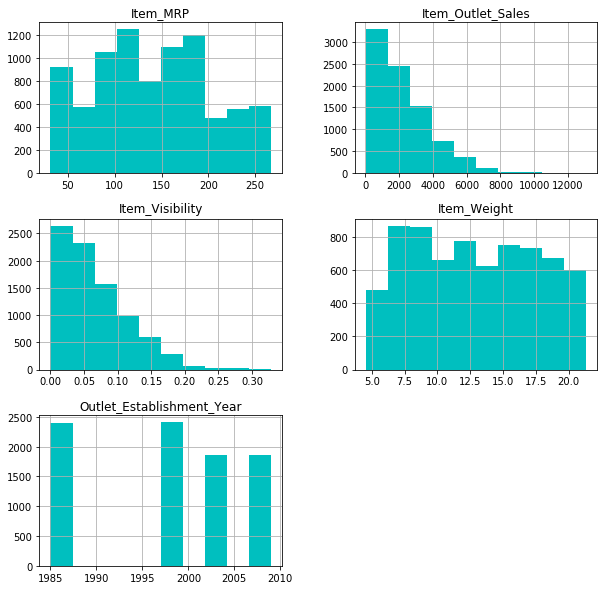

In [6]:
df.hist(figsize=(10,10),color="c")

In [7]:
# Now first of let's check the correlation of all the given columns with the sales prediction column in order to check what
# all columns are related to it in order to predict the correct output

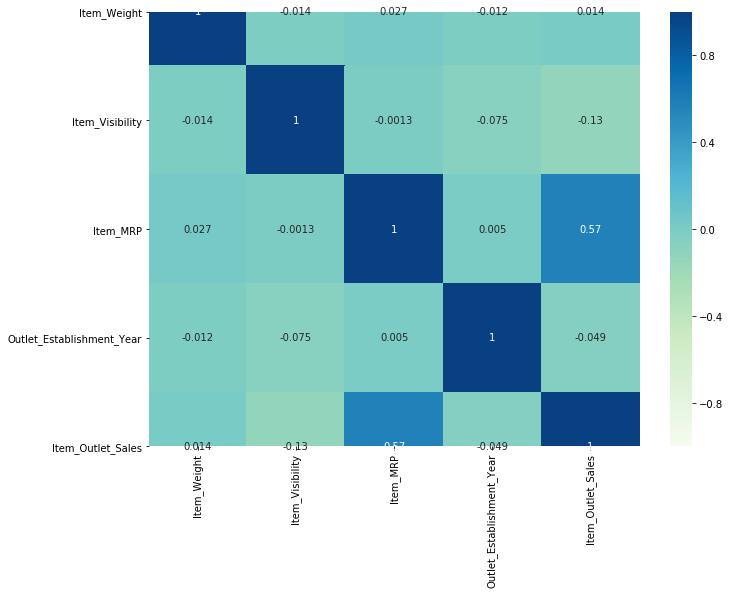

In [8]:
plt.figure(figsize=(11,8))
sns.heatmap(df.corr(),vmin=-1,vmax=1,annot=True,cmap="GnBu")
plt.show()

In [9]:
df.corr().Item_Outlet_Sales

Item_Weight                  0.014123
Item_Visibility             -0.128625
Item_MRP                     0.567574
Outlet_Establishment_Year   -0.049135
Item_Outlet_Sales            1.000000
Name: Item_Outlet_Sales, dtype: float64

From the above correlation values we can see that Item_Weight as well as Outlet_Establishment_Year have very less significance in prediction of the Item_Outlet_Sales.. So, we can remove these columns here only

In [10]:
df.drop(columns=["Item_Weight"],inplace=True)
df.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [11]:
df['Item_Identifier'].unique().shape
# this means unique values in this dataframe 1559, which is total items in it..
# This column is a categorical one

(1559,)

In [12]:
Item_identifier = {}
for i in df.Item_Identifier.unique():
    Item_identifier.update({i:df[df.Item_Identifier == i].shape[0]})

In [13]:
Item_identifier

{'FDA15': 8,
 'DRC01': 6,
 'FDN15': 7,
 'FDX07': 6,
 'NCD19': 6,
 'FDP36': 3,
 'FDO10': 8,
 'FDP10': 7,
 'FDH17': 7,
 'FDU28': 5,
 'FDY07': 7,
 'FDA03': 6,
 'FDX32': 7,
 'FDS46': 5,
 'FDF32': 5,
 'FDP49': 7,
 'NCB42': 6,
 'DRI11': 7,
 'FDU02': 7,
 'FDN22': 4,
 'FDW12': 7,
 'NCB30': 7,
 'FDC37': 3,
 'FDR28': 5,
 'NCD06': 5,
 'FDV10': 5,
 'DRJ59': 6,
 'FDE51': 7,
 'FDC14': 8,
 'FDV38': 9,
 'NCS17': 5,
 'FDP33': 6,
 'FDO23': 7,
 'DRH01': 5,
 'NCX29': 8,
 'FDV20': 8,
 'DRZ11': 6,
 'FDX10': 4,
 'FDB34': 7,
 'FDK43': 6,
 'FDA46': 6,
 'FDC02': 6,
 'FDL50': 4,
 'FDM39': 5,
 'NCP05': 8,
 'FDV49': 6,
 'FDL12': 5,
 'FDS02': 5,
 'NCL17': 4,
 'FDM40': 3,
 'FDR13': 3,
 'FDA43': 5,
 'NCP18': 7,
 'FDK21': 7,
 'NCX54': 7,
 'DRK35': 8,
 'FDY21': 6,
 'FDI26': 7,
 'FDM20': 5,
 'FDV27': 3,
 'FDF09': 6,
 'FDY40': 6,
 'FDY45': 6,
 'FDC46': 7,
 'FDH19': 7,
 'FDZ03': 5,
 'DRH37': 6,
 'NCI17': 6,
 'FDJ58': 8,
 'FDH35': 6,
 'FDG02': 5,
 'NCZ18': 7,
 'FDC29': 7,
 'FDQ10': 7,
 'FDN48': 5,
 'FDL04': 6,
 'FDV25': 5,

In [14]:
df

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [15]:
# Similarly we'll check other columns as well
df.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

Here, as we can see, we have only two different values written with different style, therefore we'll convert all of them into just two values

In [16]:
df["Item_Fat_Content"] = df["Item_Fat_Content"].replace("Low Fat","LF")
df["Item_Fat_Content"] = df["Item_Fat_Content"].replace("low fat","LF")
df["Item_Fat_Content"] = df["Item_Fat_Content"].replace("reg","RE")
df["Item_Fat_Content"] = df["Item_Fat_Content"].replace("Regular","RE")

In [17]:
df["Item_Fat_Content"].value_counts()

LF    5517
RE    3006
Name: Item_Fat_Content, dtype: int64

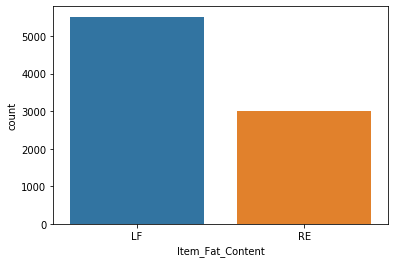

In [18]:
sns.countplot(df["Item_Fat_Content"])
# we can clearly see that people are preferring low fat options over the regular ones

In [19]:
df

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,LF,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,RE,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,LF,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,RE,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,LF,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,LF,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,RE,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,LF,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,RE,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


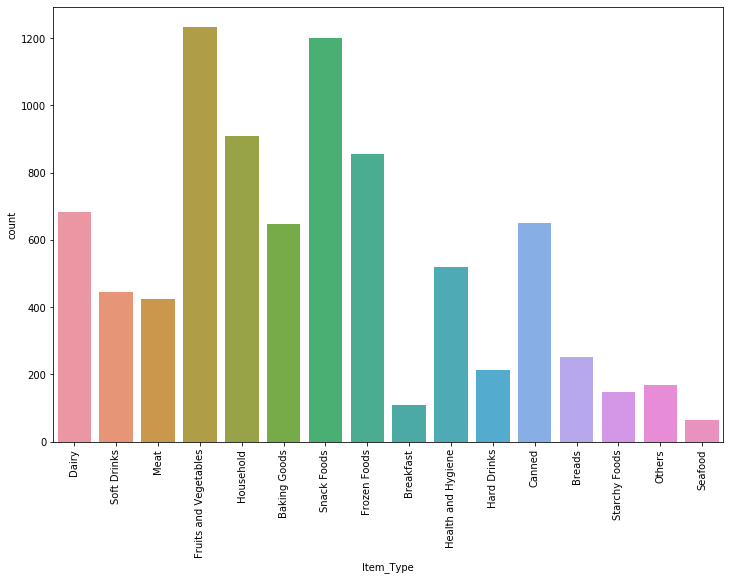

In [20]:
# for item_type
plt.figure(figsize=(12,8))
sns.countplot(df["Item_Type"])
plt.xticks(rotation=90)
plt.show()

From the above graph we can see that the type of products that are being sold the most are Fruits and Vegetables and snack foods

In [21]:
df.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,LF,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,RE,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,LF,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,RE,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,LF,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [22]:
df["Outlet_Identifier"].value_counts()

OUT027    935
OUT013    932
OUT035    930
OUT046    930
OUT049    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

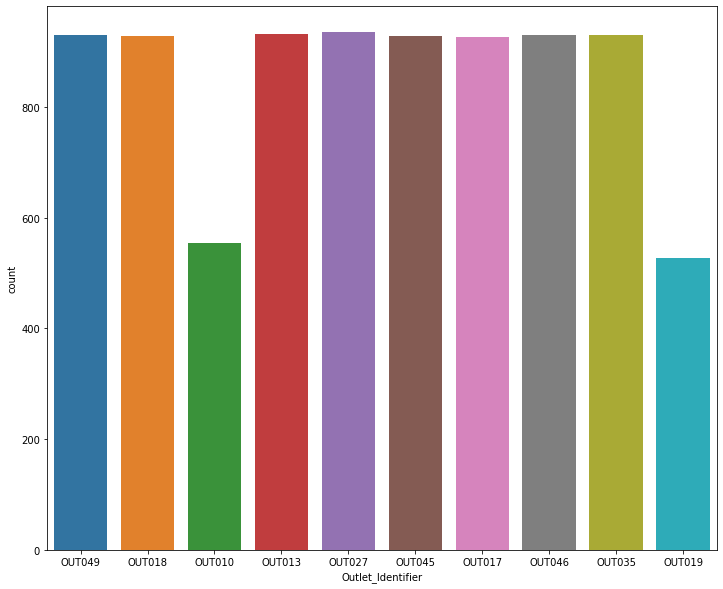

In [23]:
plt.figure(figsize=(12,10))
sns.countplot(df["Outlet_Identifier"])
# Here this outlet identifier is also a category variable just like the most of them which does not have any particular significance on the
# Item_sale

In [90]:
df.groupby(['Outlet_Location_Type','Outlet_Type'])['Outlet_Size'].value_counts()

Outlet_Location_Type  Outlet_Type        Outlet_Size
Tier 1                Grocery Store      Small          528
                      Supermarket Type1  Medium         930
                                         Small          930
Tier 2                Supermarket Type1  Small          930
Tier 3                Supermarket Type1  High           932
                      Supermarket Type2  Medium         928
                      Supermarket Type3  Medium         935
Name: Outlet_Size, dtype: int64

In [24]:
df.isnull().sum()

Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [48]:
out_size = df[df["Outlet_Size"].notnull()]

In [49]:
out_size.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [44]:
out_size_mis = df[df["Outlet_Size"].isnull()]

In [50]:
out_size_mis.Outlet_Identifier.value_counts()

OUT045    929
OUT017    926
OUT010    555
Name: Outlet_Identifier, dtype: int64

In [52]:
out_size_mis.Outlet_Establishment_Year.value_counts()

2002    929
2007    926
1998    555
Name: Outlet_Establishment_Year, dtype: int64

In [46]:
pd.crosstab(out_size_mis["Outlet_Location_Type"],out_size_mis["Outlet_Identifier"])

Outlet_Identifier,OUT010,OUT017,OUT045
Outlet_Location_Type,,,
Tier 2,0,926,929
Tier 3,555,0,0


In [47]:
pd.crosstab(out_size_mis["Outlet_Establishment_Year"],out_size_mis["Outlet_Identifier"])

Outlet_Identifier,OUT010,OUT017,OUT045
Outlet_Establishment_Year,,,
1998,555,0,0
2002,0,0,929
2007,0,926,0


In [67]:
pd.crosstab(out_size["Outlet_Size"],out_size["Outlet_Identifier"])

Outlet_Identifier,OUT013,OUT018,OUT019,OUT027,OUT035,OUT046,OUT049
Outlet_Size,,,,,,,
High,932,0,0,0,0,0,0
Medium,0,928,0,935,0,0,930
Small,0,0,528,0,930,930,0


In [76]:
t2 = df.groupby("Outlet_Location_Type",as_index=False).get_group("Tier 2")
t2.groupby("Outlet_Size",as_index=False).sum()
# Here, we can clearly see that tier 2 mostly consist of outlet_size that are small

,Outlet_Size,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,Small,56.974873,133103.907,1863720,2.268123e+06


In [79]:
t1 = df.groupby("Outlet_Location_Type",as_index=False).get_group("Tier 1")
t1.groupby("Outlet_Size",as_index=False).sum()

,Outlet_Size,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,Medium,56.549156,130476.8598,1859070,2.183970e+06
1,Small,113.488916,205920.9522,2905290,2.298089e+06


In [82]:
t1.Outlet_Size.value_counts()

Small     1458
Medium     930
Name: Outlet_Size, dtype: int64

In [80]:
t3 = df.groupby("Outlet_Location_Type",as_index=False).get_group("Tier 3")
t3.groupby("Outlet_Size",as_index=False).sum()

,Outlet_Size,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,High,55.879859,131809.0156,1851884,2.142664e+06
1,Medium,111.426219,262192.4470,3720327,5.305749e+06


In [83]:
t3.Outlet_Size.value_counts()

Medium    1863
High       932
Name: Outlet_Size, dtype: int64

In [94]:
df.groupby("Outlet_Size")["Outlet_Identifier"].value_counts()

Outlet_Size  Outlet_Identifier
High         OUT013               932
Medium       OUT027               935
             OUT049               930
             OUT018               928
Small        OUT035               930
             OUT046               930
             OUT019               528
Name: Outlet_Identifier, dtype: int64

In [101]:
out_size.groupby("Outlet_Identifier")["Outlet_Location_Type"].value_counts()

Outlet_Identifier  Outlet_Location_Type
OUT013             Tier 3                  932
OUT018             Tier 3                  928
OUT019             Tier 1                  528
OUT027             Tier 3                  935
OUT035             Tier 2                  930
OUT046             Tier 1                  930
OUT049             Tier 1                  930
Name: Outlet_Location_Type, dtype: int64

In [99]:
out_size_mis.groupby("Outlet_Identifier")["Outlet_Location_Type"].value_counts()

Outlet_Identifier  Outlet_Location_Type
OUT010             Tier 3                  555
OUT017             Tier 2                  926
OUT045             Tier 2                  929
Name: Outlet_Location_Type, dtype: int64

Now, from the above code we can see that the values that are missing are from Tier-3 and Tier-2, in which Tier-2 mostly has outlet_size as small, but the missing values are between medium and small whereas Tier 3 has outlet size as medium and high..

In [113]:
df.Outlet_Size[df.Outlet_Identifier=="OUT017"] = "Medium"
df.Outlet_Size[df.Outlet_Identifier=="OUT045"] = "Medium"

C:\Users\naman\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\naman\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [114]:
df.Outlet_Size[df.Outlet_Identifier=="OUT010"] = "High"

C:\Users\naman\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [115]:
df.Outlet_Size[df.Outlet_Size != "Small"].value_counts()

Medium    4648
High      1487
Name: Outlet_Size, dtype: int64

In [116]:
# Now, we have no more data empty in our dataset
df.isnull().sum()

Item_Identifier         0
Item_Fat_Content        0
Item_Visibility         0
Item_Type               0
Item_MRP                0
Outlet_Identifier       0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
Item_Outlet_Sales       0
dtype: int64

In [111]:
df.drop(columns=["Outlet_Establishment_Year"],inplace=True)

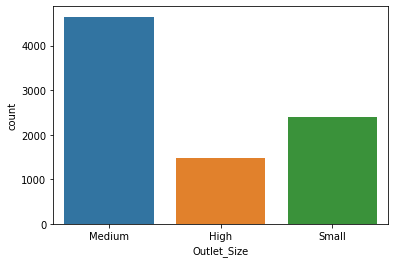

In [117]:
# here from this graph we can see that most of the outlets are of medium size
sns.countplot(df["Outlet_Size"])

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64


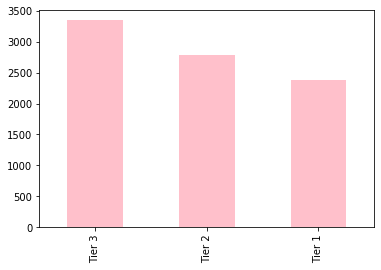

In [118]:
ct = df["Outlet_Location_Type"].value_counts()
ct.plot(kind="bar",color="pink")
print(ct)

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64


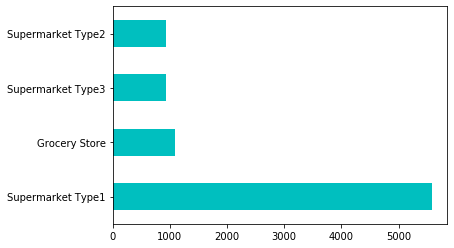

In [119]:
ct1 = df["Outlet_Type"].value_counts()
print(ct1)
ct1.plot(kind="barh",color="c")

In [120]:
# grouping outlet_type and item_outlet_sales
grp = df[["Outlet_Type","Item_Outlet_Sales"]]
grp

,Outlet_Type,Item_Outlet_Sales
0,Supermarket Type1,3735.1380
1,Supermarket Type2,443.4228
2,Supermarket Type1,2097.2700
3,Grocery Store,732.3800
4,Supermarket Type1,994.7052
...,...,...
8518,Supermarket Type1,2778.3834
8519,Supermarket Type1,549.2850
8520,Supermarket Type1,1193.1136
8521,Supermarket Type2,1845.5976


In [121]:
grp_ = grp.groupby("Outlet_Type",as_index=False).sum()
grp_

,Outlet_Type,Item_Outlet_Sales
0,Grocery Store,3.680343e+05
1,Supermarket Type1,1.291734e+07
2,Supermarket Type2,1.851823e+06
3,Supermarket Type3,3.453926e+06


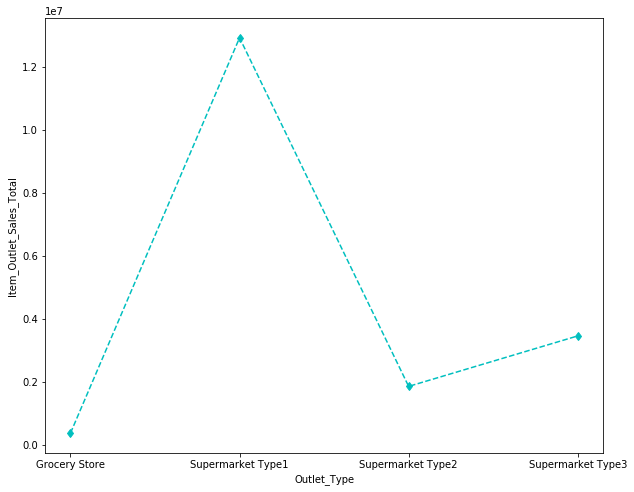

In [122]:
plt.figure(figsize=(10,8))

plt.plot(grp_["Outlet_Type"],grp_["Item_Outlet_Sales"],"cd--")
plt.xlabel("Outlet_Type")
plt.ylabel("Item_Outlet_Sales_Total")
plt.show()

In [123]:
# Here we are basically trying to visualize the data in order to understand it better
pd.crosstab(df["Item_Type"],df["Item_Fat_Content"])

Item_Fat_Content,LF,RE
Item_Type,,
Baking Goods,329,319
Breads,140,111
Breakfast,41,69
Canned,341,308
Dairy,418,264
Frozen Foods,450,406
Fruits and Vegetables,630,602
Hard Drinks,214,0
Health and Hygiene,520,0


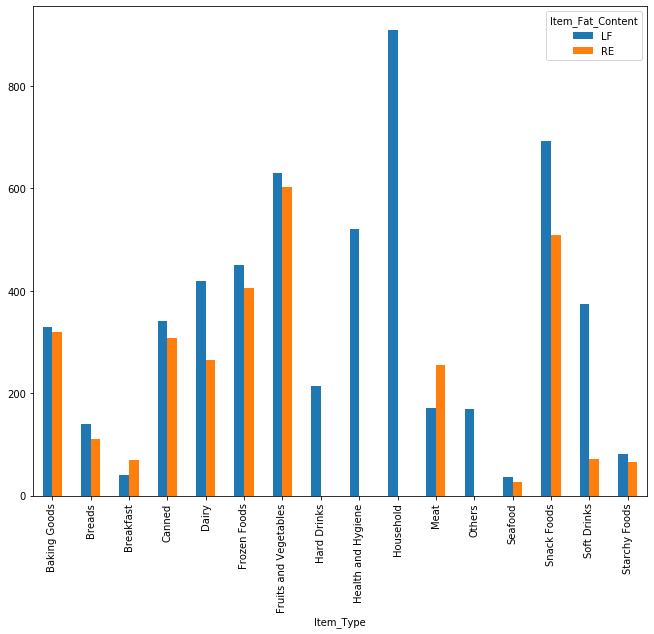

In [124]:
pd.crosstab(df["Item_Type"],df["Item_Fat_Content"]).plot(kind="bar",figsize=(11,9))

In [125]:
grp1 = df[["Item_Type","Item_MRP"]]
grp1

,Item_Type,Item_MRP
0,Dairy,249.8092
1,Soft Drinks,48.2692
2,Meat,141.6180
3,Fruits and Vegetables,182.0950
4,Household,53.8614
...,...,...
8518,Snack Foods,214.5218
8519,Baking Goods,108.1570
8520,Health and Hygiene,85.1224
8521,Snack Foods,103.1332


In [126]:
grp1_ = grp1.groupby("Item_Type",as_index=False).sum()

In [127]:
grp1_

,Item_Type,Item_MRP
0,Baking Goods,81894.7364
1,Breads,35379.1198
2,Breakfast,15596.6966
3,Canned,90706.7270
4,Dairy,101276.4596
5,Frozen Foods,118558.8814
6,Fruits and Vegetables,178124.0810
7,Hard Drinks,29334.6766
8,Health and Hygiene,68025.8388
9,Household,135976.5254


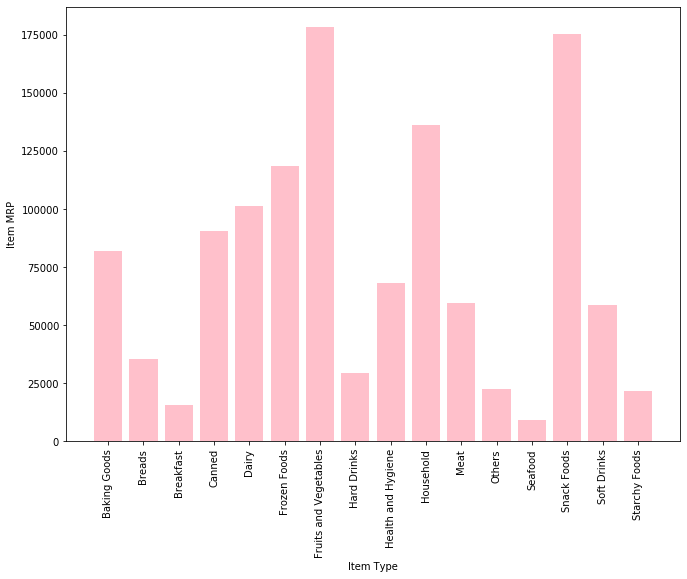

In [128]:
plt.figure(figsize=(11,8))

plt.bar(grp1_["Item_Type"],grp1_["Item_MRP"],color="pink")

plt.xlabel("Item Type")
plt.xticks(rotation=90)

plt.ylabel("Item MRP")

plt.show()

### Preparing the data for training

In [129]:
df.drop(columns=["Item_Identifier"],inplace=True)

In [130]:
# Here in order to perform onehotencoding on categorical data we had to remove the Item_Identifier column as it as over 1500 categories
# which will create more than 1500 dimensions for our dataframe and it'll become difficult to train it then
df

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,LF,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380
1,RE,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228
2,LF,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700
3,RE,0.000000,Fruits and Vegetables,182.0950,OUT010,High,Tier 3,Grocery Store,732.3800
4,LF,0.000000,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...
8518,LF,0.056783,Snack Foods,214.5218,OUT013,High,Tier 3,Supermarket Type1,2778.3834
8519,RE,0.046982,Baking Goods,108.1570,OUT045,Medium,Tier 2,Supermarket Type1,549.2850
8520,LF,0.035186,Health and Hygiene,85.1224,OUT035,Small,Tier 2,Supermarket Type1,1193.1136
8521,RE,0.145221,Snack Foods,103.1332,OUT018,Medium,Tier 3,Supermarket Type2,1845.5976


Now, to prepare data for training part we'll encode all the categorical data in one hot format in order to get better results and to do that we'll first use Labelencoder() and then pd.get_dummies() function

In [131]:
le = LabelEncoder()

In [132]:
df.Item_Fat_Content = le.fit_transform(df.Item_Fat_Content)
df.Item_Type = le.fit_transform(df.Item_Type)
df.Outlet_Identifier = le.fit_transform(df.Outlet_Identifier)
df.Outlet_Size = le.fit_transform(df.Outlet_Size)
df.Outlet_Location_Type = le.fit_transform(df.Outlet_Location_Type)
df.Outlet_Type = le.fit_transform(df.Outlet_Type)

In [133]:
Y_train = df["Item_Outlet_Sales"]
X_train = df.drop(columns=["Item_Outlet_Sales"])

In [134]:
X_train

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,0,0.016047,4,249.8092,9,1,0,1
1,1,0.019278,14,48.2692,3,1,2,2
2,0,0.016760,10,141.6180,9,1,0,1
3,1,0.000000,6,182.0950,0,0,2,0
4,0,0.000000,9,53.8614,1,0,2,1
...,...,...,...,...,...,...,...,...
8518,0,0.056783,13,214.5218,1,0,2,1
8519,1,0.046982,0,108.1570,7,1,1,1
8520,0,0.035186,8,85.1224,6,2,1,1
8521,1,0.145221,13,103.1332,3,1,2,2


In [135]:
X_train = pd.get_dummies(X_train, columns=["Item_Fat_Content","Item_Type","Outlet_Identifier","Outlet_Size","Outlet_Location_Type","Outlet_Type"])

In [138]:
X_train

,Item_Visibility,Item_MRP,Item_Fat_Content_0,Item_Fat_Content_1,Item_Type_0,Item_Type_1,Item_Type_2,Item_Type_3,Item_Type_4,Item_Type_5,...,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3
0,0.016047,249.8092,1,0,0,0,0,0,1,0,...,0,1,0,1,0,0,0,1,0,0
1,0.019278,48.2692,0,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,0.016760,141.6180,1,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,0.000000,182.0950,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,1,0,0,0
4,0.000000,53.8614,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,0.056783,214.5218,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
8519,0.046982,108.1570,0,1,1,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
8520,0.035186,85.1224,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
8521,0.145221,103.1332,0,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [137]:
# Hence now we are ready to train our model with this dataset

## ElasticNet regression

In [139]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import cross_val_score
el = ElasticNet()

In [140]:
el.fit(X_train,Y_train)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [141]:
score=cross_val_score(el,X_train,Y_train,cv=10,scoring='neg_mean_squared_error')
el_score_cross=np.sqrt(-score)
np.mean(el_score_cross),np.std(el_score_cross)

(1254.7316988342222, 25.35222304238713)

## Random Forest

In [142]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [143]:
rf.fit(X_train,Y_train)

C:\Users\naman\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [144]:
# Cross_Validation
score=cross_val_score(rf,X_train,Y_train,cv=10,scoring='neg_mean_squared_error')
rf_score_cross=np.sqrt(-score)
np.mean(rf_score_cross),np.std(rf_score_cross)

(1175.1165313938411, 26.649293268313816)

## D-Tree

In [145]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()

In [146]:
dt.fit(X_train,Y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [147]:
score=cross_val_score(dt,X_train,Y_train,cv=10,scoring='neg_mean_squared_error')
dt_score_cross=np.sqrt(-score)
np.mean(dt_score_cross),np.std(dt_score_cross)

(1546.5948189017631, 25.544400998212698)

## GradientBoosting Regressor

In [148]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()

class sklearn.ensemble.GradientBoostingRegressor(*, loss='ls', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, min_impurity_split=None, init=None, random_state=None, max_features=None, alpha=0.9, verbose=0, max_leaf_nodes=None, warm_start=False, presort='deprecated', validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)[source]¶

Link to understand each single one of the parameter in GradientBoosting Regressor-> https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html

In [149]:
gbr.fit(X_train,Y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [150]:
score=cross_val_score(gbr,X_train,Y_train,cv=10,scoring='neg_mean_squared_error')
gbr_score_cross=np.sqrt(-score)
np.mean(gbr_score_cross),np.std(gbr_score_cross)

(1084.8650547740515, 18.828304918414577)

In [151]:
# method to sort and compare all values for better performance
Algo_Used = ["ElasticNet","Random Forest","D-Tree","Gradient Boosting"]
error = pd.DataFrame({"RMSE_value":[np.mean(el_score_cross),np.mean(rf_score_cross),np.mean(dt_score_cross),np.mean(gbr_score_cross)]},index=Algo_Used)

In [152]:
error["RMSE_value"].sort_values()

Gradient Boosting    1084.865055
Random Forest        1175.116531
ElasticNet           1254.731699
D-Tree               1546.594819
Name: RMSE_value, dtype: float64

### Test set preperation

Now, we have three of our models trained on the given training dataset.. we'll now preprocess the testing data in a similar way as we did for the training data and then we'll predict our outputs

In [153]:
df_test = pd.read_csv("test.csv")

In [154]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
Item_Identifier              5681 non-null object
Item_Weight                  4705 non-null float64
Item_Fat_Content             5681 non-null object
Item_Visibility              5681 non-null float64
Item_Type                    5681 non-null object
Item_MRP                     5681 non-null float64
Outlet_Identifier            5681 non-null object
Outlet_Establishment_Year    5681 non-null int64
Outlet_Size                  4075 non-null object
Outlet_Location_Type         5681 non-null object
Outlet_Type                  5681 non-null object
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [155]:
df_test = df_test.drop(columns=["Item_Identifier","Item_Weight","Outlet_Establishment_Year"])

In [156]:
df_test["Outlet_Size"] = df_test["Outlet_Size"].fillna(df_test["Outlet_Size"].mode()[0])

In [157]:
df_test.describe()

,Item_Visibility,Item_MRP
count,5681.000000,5681.000000
mean,0.065684,141.023273
std,0.051252,61.809091
min,0.000000,31.990000
25%,0.027047,94.412000
50%,0.054154,141.415400
75%,0.093463,186.026600
max,0.323637,266.588400


In [158]:
df_test["Item_Fat_Content"] = df_test["Item_Fat_Content"].replace("Low Fat","LF")
df_test["Item_Fat_Content"] = df_test["Item_Fat_Content"].replace("low fat","LF")
df_test["Item_Fat_Content"] = df_test["Item_Fat_Content"].replace("reg","RE")
df_test["Item_Fat_Content"] = df_test["Item_Fat_Content"].replace("Regular","RE")

In [159]:
X_test = df_test
X_test

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,LF,0.007565,Snack Foods,107.8622,OUT049,Medium,Tier 1,Supermarket Type1
1,RE,0.038428,Dairy,87.3198,OUT017,Medium,Tier 2,Supermarket Type1
2,LF,0.099575,Others,241.7538,OUT010,Medium,Tier 3,Grocery Store
3,LF,0.015388,Snack Foods,155.0340,OUT017,Medium,Tier 2,Supermarket Type1
4,RE,0.118599,Dairy,234.2300,OUT027,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...
5676,RE,0.013496,Snack Foods,141.3154,OUT046,Small,Tier 1,Supermarket Type1
5677,RE,0.142991,Starchy Foods,169.1448,OUT018,Medium,Tier 3,Supermarket Type2
5678,LF,0.073529,Health and Hygiene,118.7440,OUT045,Medium,Tier 2,Supermarket Type1
5679,RE,0.000000,Canned,214.6218,OUT017,Medium,Tier 2,Supermarket Type1


In [160]:
X_test.Item_Fat_Content = le.fit_transform(X_test.Item_Fat_Content)
X_test.Item_Type = le.fit_transform(X_test.Item_Type)
X_test.Outlet_Identifier = le.fit_transform(X_test.Outlet_Identifier)
X_test.Outlet_Size = le.fit_transform(X_test.Outlet_Size)
X_test.Outlet_Location_Type = le.fit_transform(X_test.Outlet_Location_Type)
X_test.Outlet_Type = le.fit_transform(X_test.Outlet_Type)

In [161]:
X_test = pd.get_dummies(X_test,columns=["Item_Fat_Content","Item_Type","Outlet_Identifier","Outlet_Size","Outlet_Location_Type","Outlet_Type"])

# Predictions

In [162]:
# ElasticNet
predict_el = el.predict(X_test)

In [163]:
print(predict_el.shape)
predict_el

(5681,)


array([1747.51302348, 1526.76846865, 3379.07174033, ..., 1969.39053147,
       3521.04842568, 1391.78663266])

In [164]:
# Random Forest prediction
predict_rf = rf.predict(X_test)

In [165]:
print(predict_rf.shape)
predict_rf

(5681,)


array([1655.8446 , 1214.68552,  657.8104 , ..., 1529.27602, 5900.78566,
       1746.85946])

In [166]:
# D-tree
predict_dt = dt.predict(X_test)

In [167]:
print(predict_dt.shape)
predict_dt

(5681,)


array([1693.7952,  959.4178, 1046.6376, ..., 1506.0396, 7247.233 ,
       1090.5804])

In [168]:
# For gradient boosting regressor
predict_gbr = gbr.predict(X_test)

In [169]:
print(predict_gbr.shape)
predict_gbr

(5681,)


array([1654.77144851, 1400.1350694 ,  530.61701033, ..., 1798.96791327,
       3769.2461432 , 1297.19971433])

## Creating the csv file to be submitted for AV solution

In [170]:
submit = pd.read_csv("test.csv")

In [171]:
submit.drop(columns=["Item_Fat_Content","Item_Type","Outlet_Size","Outlet_Location_Type","Outlet_Type","Item_Weight","Outlet_Establishment_Year"],inplace=True)

In [172]:
submit.drop(columns=["Item_Visibility","Item_MRP"],inplace=True)

In [173]:
submit

,Item_Identifier,Outlet_Identifier
0,FDW58,OUT049
1,FDW14,OUT017
2,NCN55,OUT010
3,FDQ58,OUT017
4,FDY38,OUT027
...,...,...
5676,FDB58,OUT046
5677,FDD47,OUT018
5678,NCO17,OUT045
5679,FDJ26,OUT017


In [83]:
# for random forest
submit["Item_Outlet_Sales"] = [y for y in predict_rf]

In [84]:
submit.to_csv("Rfsolution.csv")

In [85]:
# for ElasticNet
submit["Item_Outlet_Sales"] = [y for y in predict_el]

In [86]:
submit.to_csv("elsolution.csv")

In [87]:
# for D-tree
submit["Item_Outlet_Sales"] = [y for y in predict_dt]

In [88]:
submit.to_csv("dtsolution.csv")

In [174]:
# for gradientboosting regressor
submit["Item_Outlet_Sales"] = [y for y in predict_gbr]

In [175]:
submit.to_csv("gbr2solution.csv")

In [115]:
# Best submitted solution that we have is gbrsolution.csv